<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/residuals_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

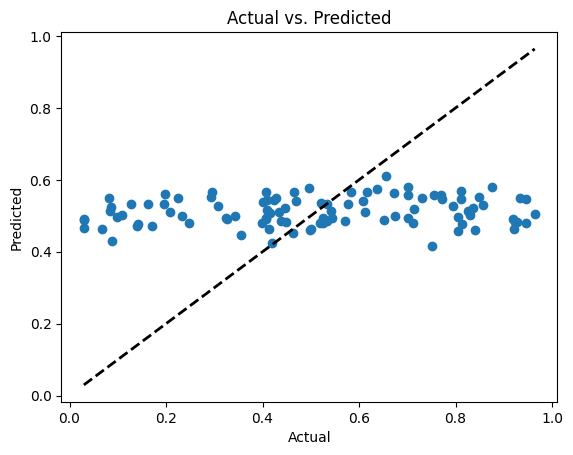

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example data
X = np.random.rand(100, 3)  # Independent variables
y = np.random.rand(100)  # Dependent variable

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot
plt.scatter(y, predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


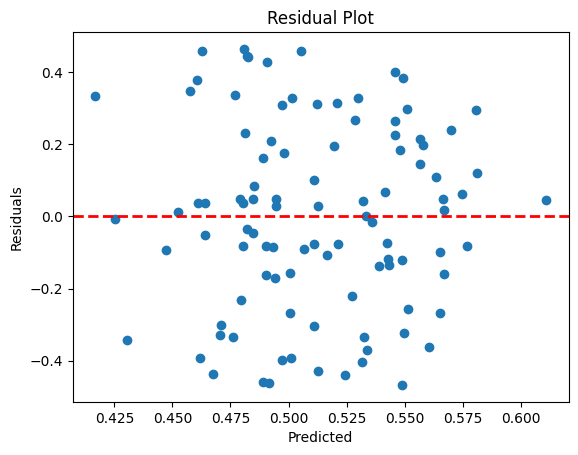

In [2]:
import matplotlib.pyplot as plt

# Plot
plt.scatter(predictions, model.resid)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


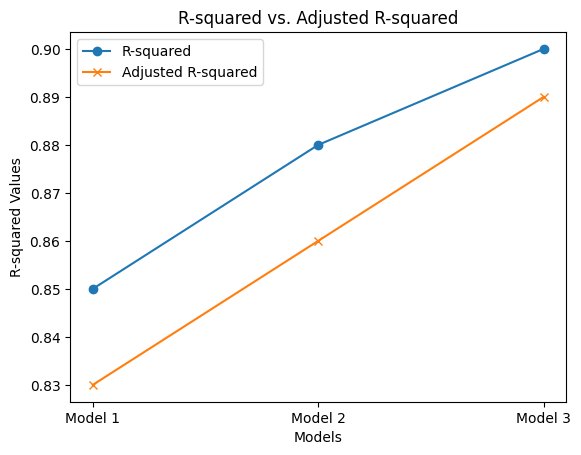

In [3]:
import matplotlib.pyplot as plt

# Example data for multiple models (R-squared and Adjusted R-squared values)
models = ['Model 1', 'Model 2', 'Model 3']
r_squared_values = [0.85, 0.88, 0.90]
adjusted_r_squared_values = [0.83, 0.86, 0.89]

# Plot
plt.plot(models, r_squared_values, label='R-squared', marker='o')
plt.plot(models, adjusted_r_squared_values, label='Adjusted R-squared', marker='x')
plt.xlabel('Models')
plt.ylabel('R-squared Values')
plt.title('R-squared vs. Adjusted R-squared')
plt.legend()
plt.show()


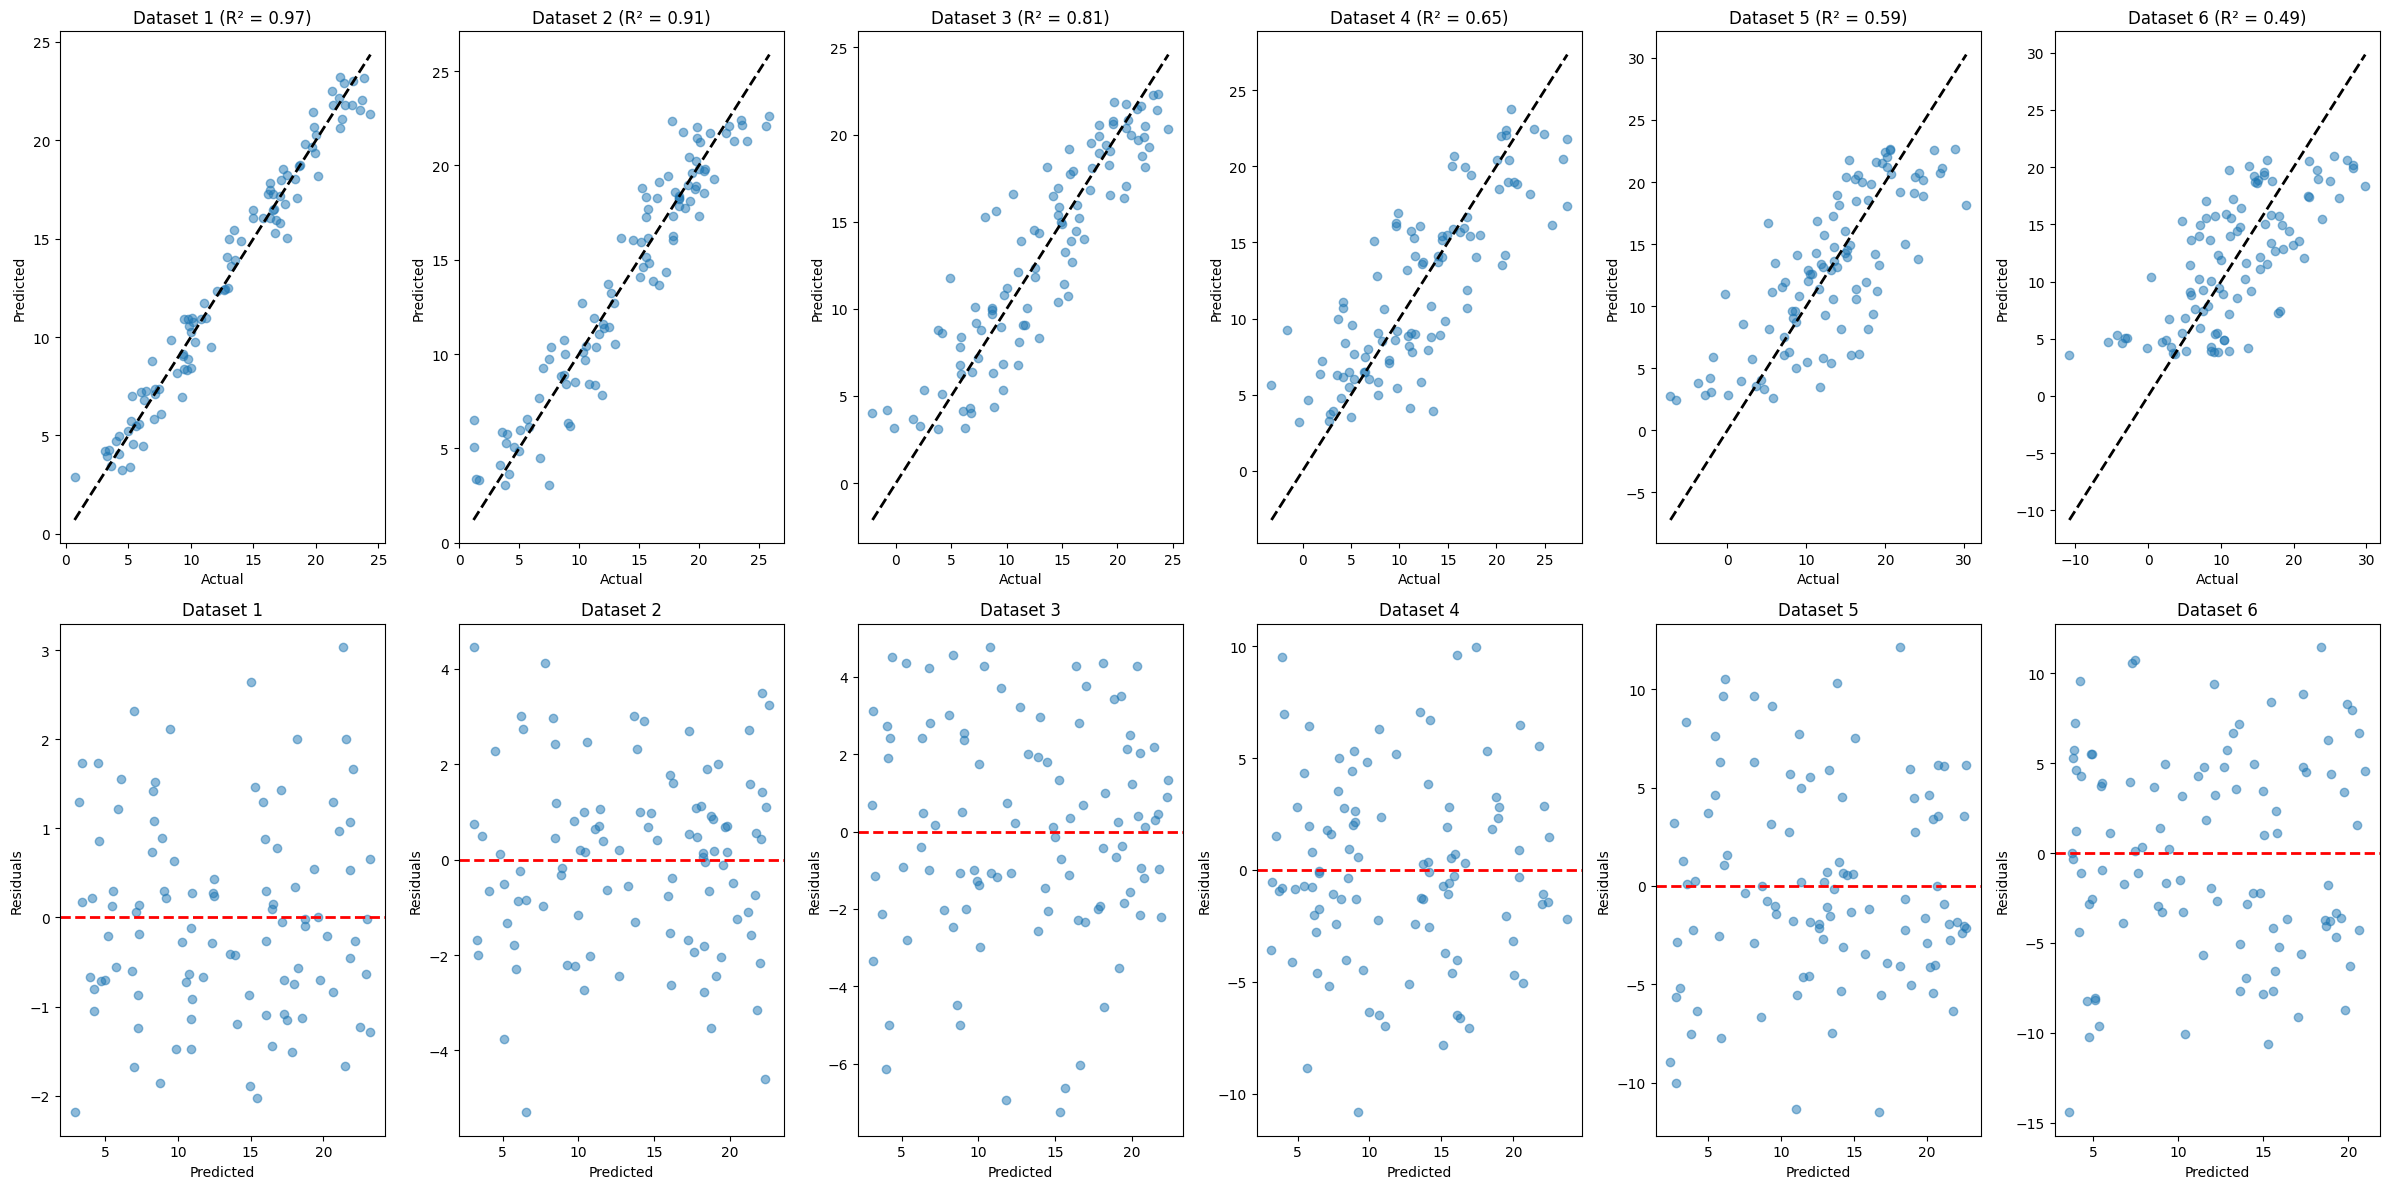

Dataset 1: R² = 0.97, Residual Variance = 1.24
Dataset 2: R² = 0.91, Residual Variance = 3.60
Dataset 3: R² = 0.81, Residual Variance = 7.91
Dataset 4: R² = 0.65, Residual Variance = 17.13
Dataset 5: R² = 0.59, Residual Variance = 25.80
Dataset 6: R² = 0.49, Residual Variance = 32.42


In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def generate_dataset(n_samples, noise_level):
    X = np.random.rand(n_samples, 1) * 10  # Independent variable
    y = 2 * X[:, 0] + 3 + np.random.randn(n_samples) * noise_level  # Dependent variable
    return X, y

def fit_and_plot(X, y, dataset_number):
    X = sm.add_constant(X)  # Add a constant for the intercept
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Actual vs. Predicted Plot
    plt.subplot(2, 6, dataset_number)
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Dataset {dataset_number} (R² = {model.rsquared:.2f})')

    # Residual Plot
    plt.subplot(2, 6, dataset_number + 6)
    plt.scatter(predictions, model.resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Dataset {dataset_number}')

    return model.rsquared, np.mean(np.square(model.resid))

n_samples = 100
noise_levels = [1, 2, 3, 4, 5, 6]  # Increasing noise levels
r_squared_values = []
residual_variances = []

plt.figure(figsize=(24, 12))

for i, noise_level in enumerate(noise_levels, start=1):
    X, y = generate_dataset(n_samples, noise_level)
    r_squared, residual_variance = fit_and_plot(X, y, i)
    r_squared_values.append(r_squared)
    residual_variances.append(residual_variance)

plt.tight_layout()
plt.show()

# Print R-squared and Residual Variance
for i in range(6):
    print(f'Dataset {i+1}: R² = {r_squared_values[i]:.2f}, Residual Variance = {residual_variances[i]:.2f}')


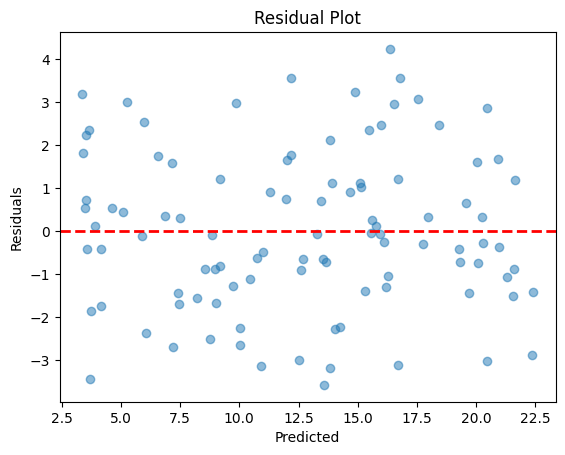

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example data
X = np.random.rand(100, 1) * 10
y = 2 * X[:, 0] + 3 + np.random.randn(100) * 2

# Fit the regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Residual plot
predictions = model.predict(X)
plt.scatter(predictions, model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [6]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f'Breusch-Pagan test p-value: {bp_test[1]}')


Breusch-Pagan test p-value: 0.9501804665938871


In [8]:
# Print Breusch-Pagan
for i in range(6):
    print(f'Dataset {i+1}: DP = {bp_test[i]:.2f}')

Dataset 1: DP = 0.00
Dataset 2: DP = 0.95
Dataset 3: DP = 0.00
Dataset 4: DP = 0.95


IndexError: tuple index out of range

Dataset 1:
  Lagrange Multiplier Statistic: 3.55
  p-value: 0.06
  f-value: 3.61
  f p-value: 0.06
---
Dataset 2:
  Lagrange Multiplier Statistic: 0.01
  p-value: 0.91
  f-value: 0.01
  f p-value: 0.91
---
Dataset 3:
  Lagrange Multiplier Statistic: 0.62
  p-value: 0.43
  f-value: 0.61
  f p-value: 0.44
---
Dataset 4:
  Lagrange Multiplier Statistic: 0.86
  p-value: 0.35
  f-value: 0.85
  f p-value: 0.36
---
Dataset 5:
  Lagrange Multiplier Statistic: 1.83
  p-value: 0.18
  f-value: 1.82
  f p-value: 0.18
---
Dataset 6:
  Lagrange Multiplier Statistic: 0.07
  p-value: 0.79
  f-value: 0.07
  f p-value: 0.80
---


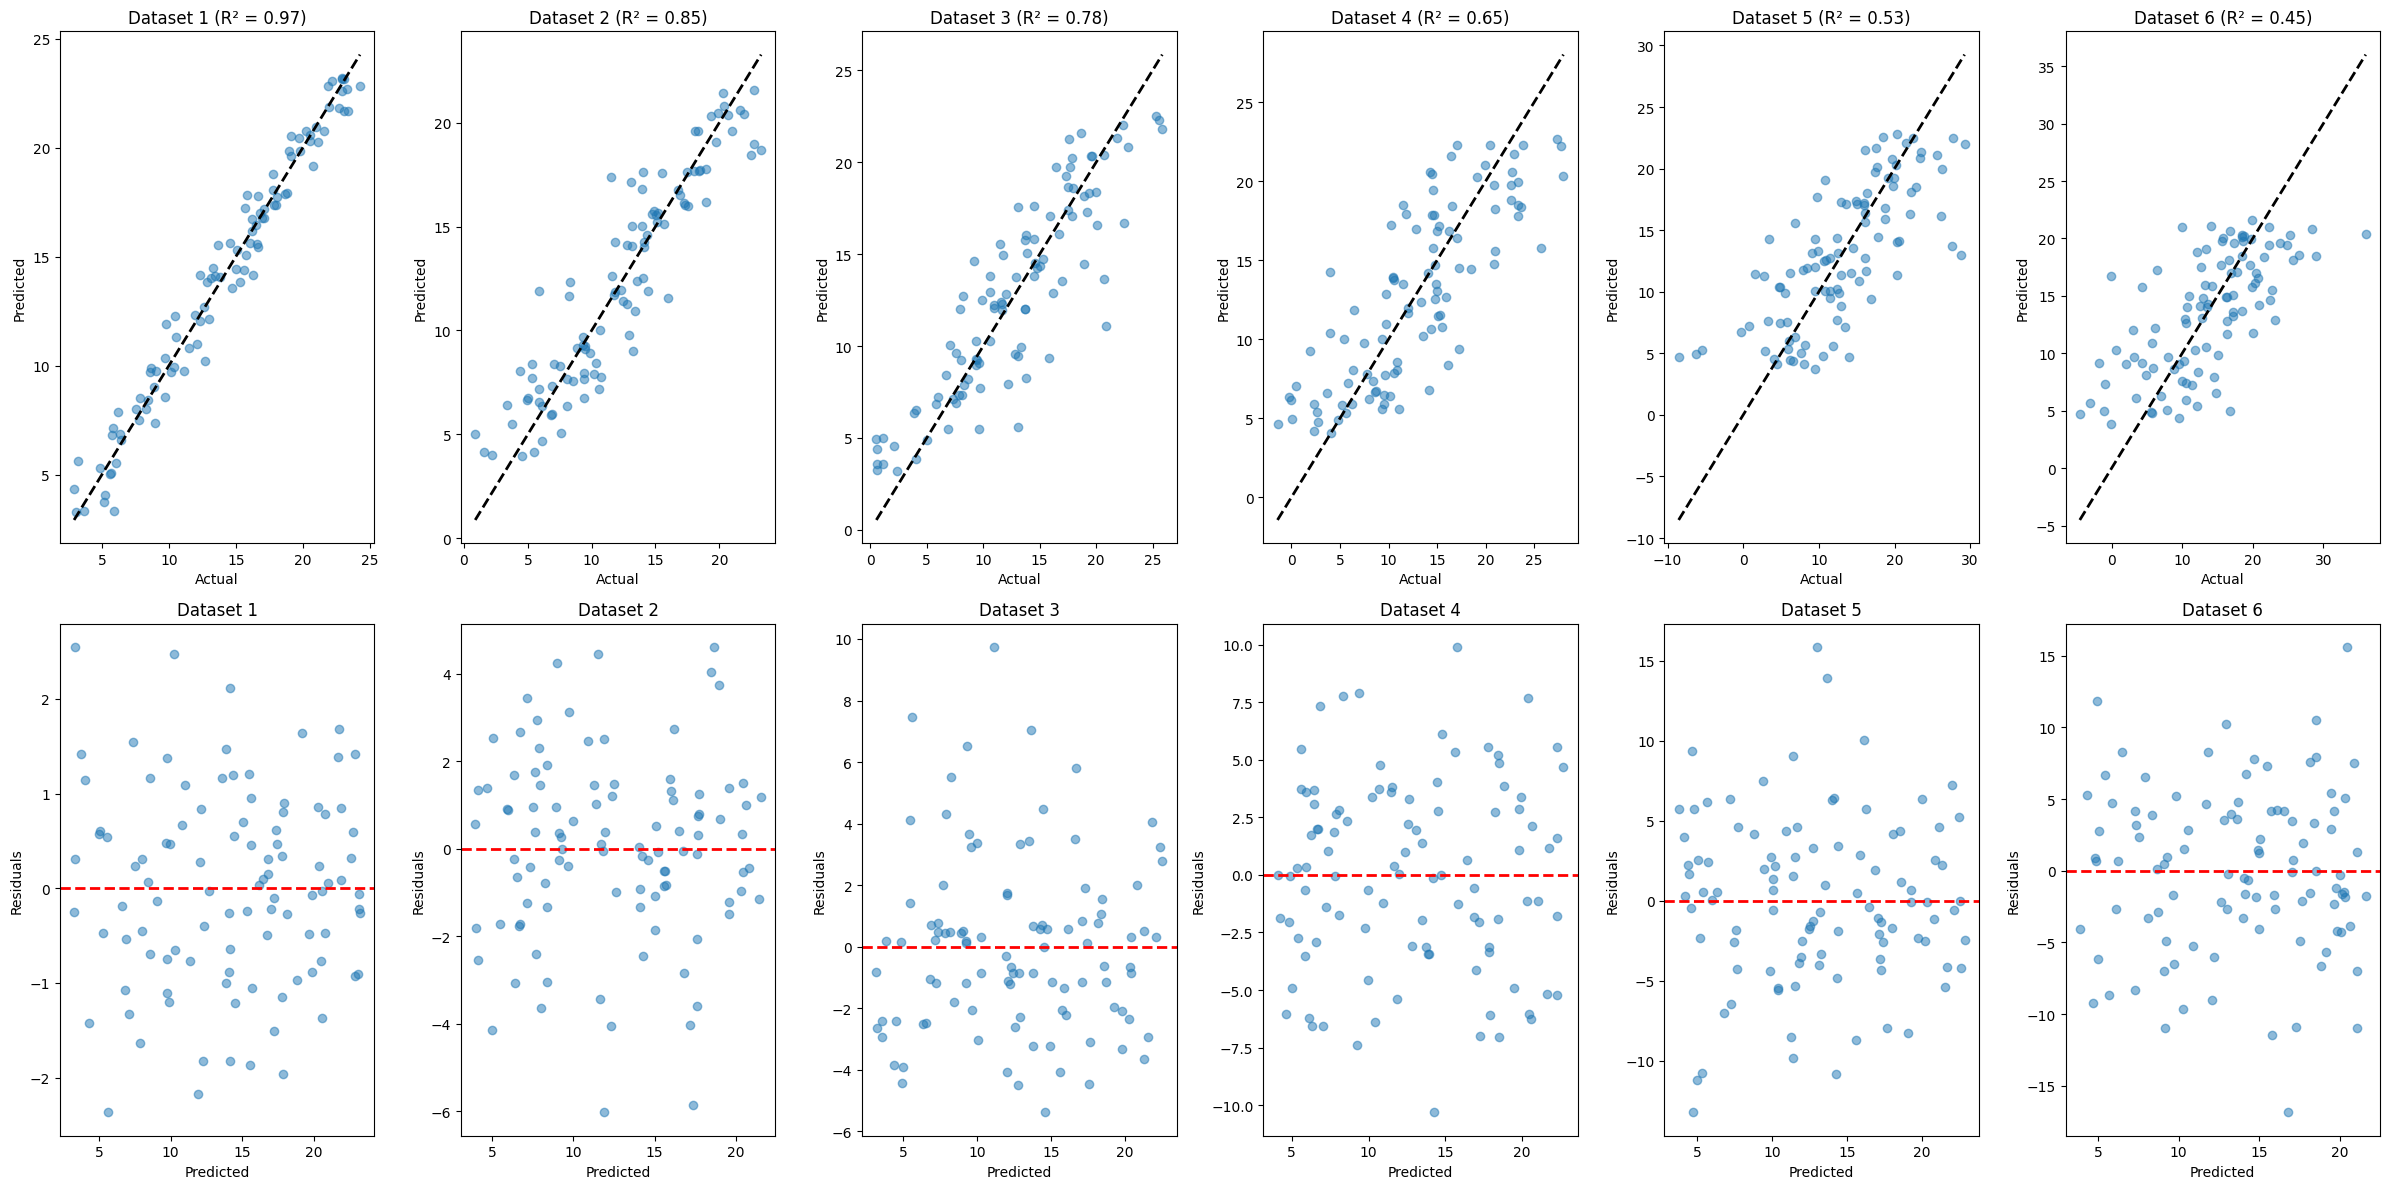

In [9]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

def generate_dataset(n_samples, noise_level):
    X = np.random.rand(n_samples, 1) * 10  # Independent variable
    y = 2 * X[:, 0] + 3 + np.random.randn(n_samples) * noise_level  # Dependent variable
    return X, y

def fit_and_plot(X, y, dataset_number):
    X = sm.add_constant(X)  # Add a constant for the intercept
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Actual vs. Predicted Plot
    plt.subplot(2, 6, dataset_number)
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Dataset {dataset_number} (R² = {model.rsquared:.2f})')

    # Residual Plot
    plt.subplot(2, 6, dataset_number + 6)
    plt.scatter(predictions, model.resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Dataset {dataset_number}')

    return model # Return the model instead of just R-squared and residual variance

n_samples = 100
noise_levels = [1, 2, 3, 4, 5, 6]  # Increasing noise levels

plt.figure(figsize=(24, 12))

for i, noise_level in enumerate(noise_levels, start=1):
    X, y = generate_dataset(n_samples, noise_level)
    model = fit_and_plot(X, y, i) # Get the model for each dataset

    # Perform Breusch-Pagan test for each dataset
    bp_test = het_breuschpagan(model.resid, model.model.exog)

    # Print the results for each dataset
    print(f'Dataset {i}:')
    print(f'  Lagrange Multiplier Statistic: {bp_test[0]:.2f}')
    print(f'  p-value: {bp_test[1]:.2f}')
    print(f'  f-value: {bp_test[2]:.2f}')
    print(f'  f p-value: {bp_test[3]:.2f}')
    print('---')

plt.tight_layout()
plt.show()

Dataset 1:
  Lagrange Multiplier Statistic: 2.83
  p-value: 0.24
  f-value: 1.41
  f p-value: 0.25
---
Dataset 2:
  Lagrange Multiplier Statistic: 1.89
  p-value: 0.39
  f-value: 0.94
  f p-value: 0.40
---
Dataset 3:
  Lagrange Multiplier Statistic: 0.67
  p-value: 0.71
  f-value: 0.33
  f p-value: 0.72
---
Dataset 4:
  Lagrange Multiplier Statistic: 0.04
  p-value: 0.98
  f-value: 0.02
  f p-value: 0.98
---
Dataset 5:
  Lagrange Multiplier Statistic: 4.15
  p-value: 0.13
  f-value: 2.10
  f p-value: 0.13
---
Dataset 6:
  Lagrange Multiplier Statistic: 1.58
  p-value: 0.45
  f-value: 0.78
  f p-value: 0.46
---


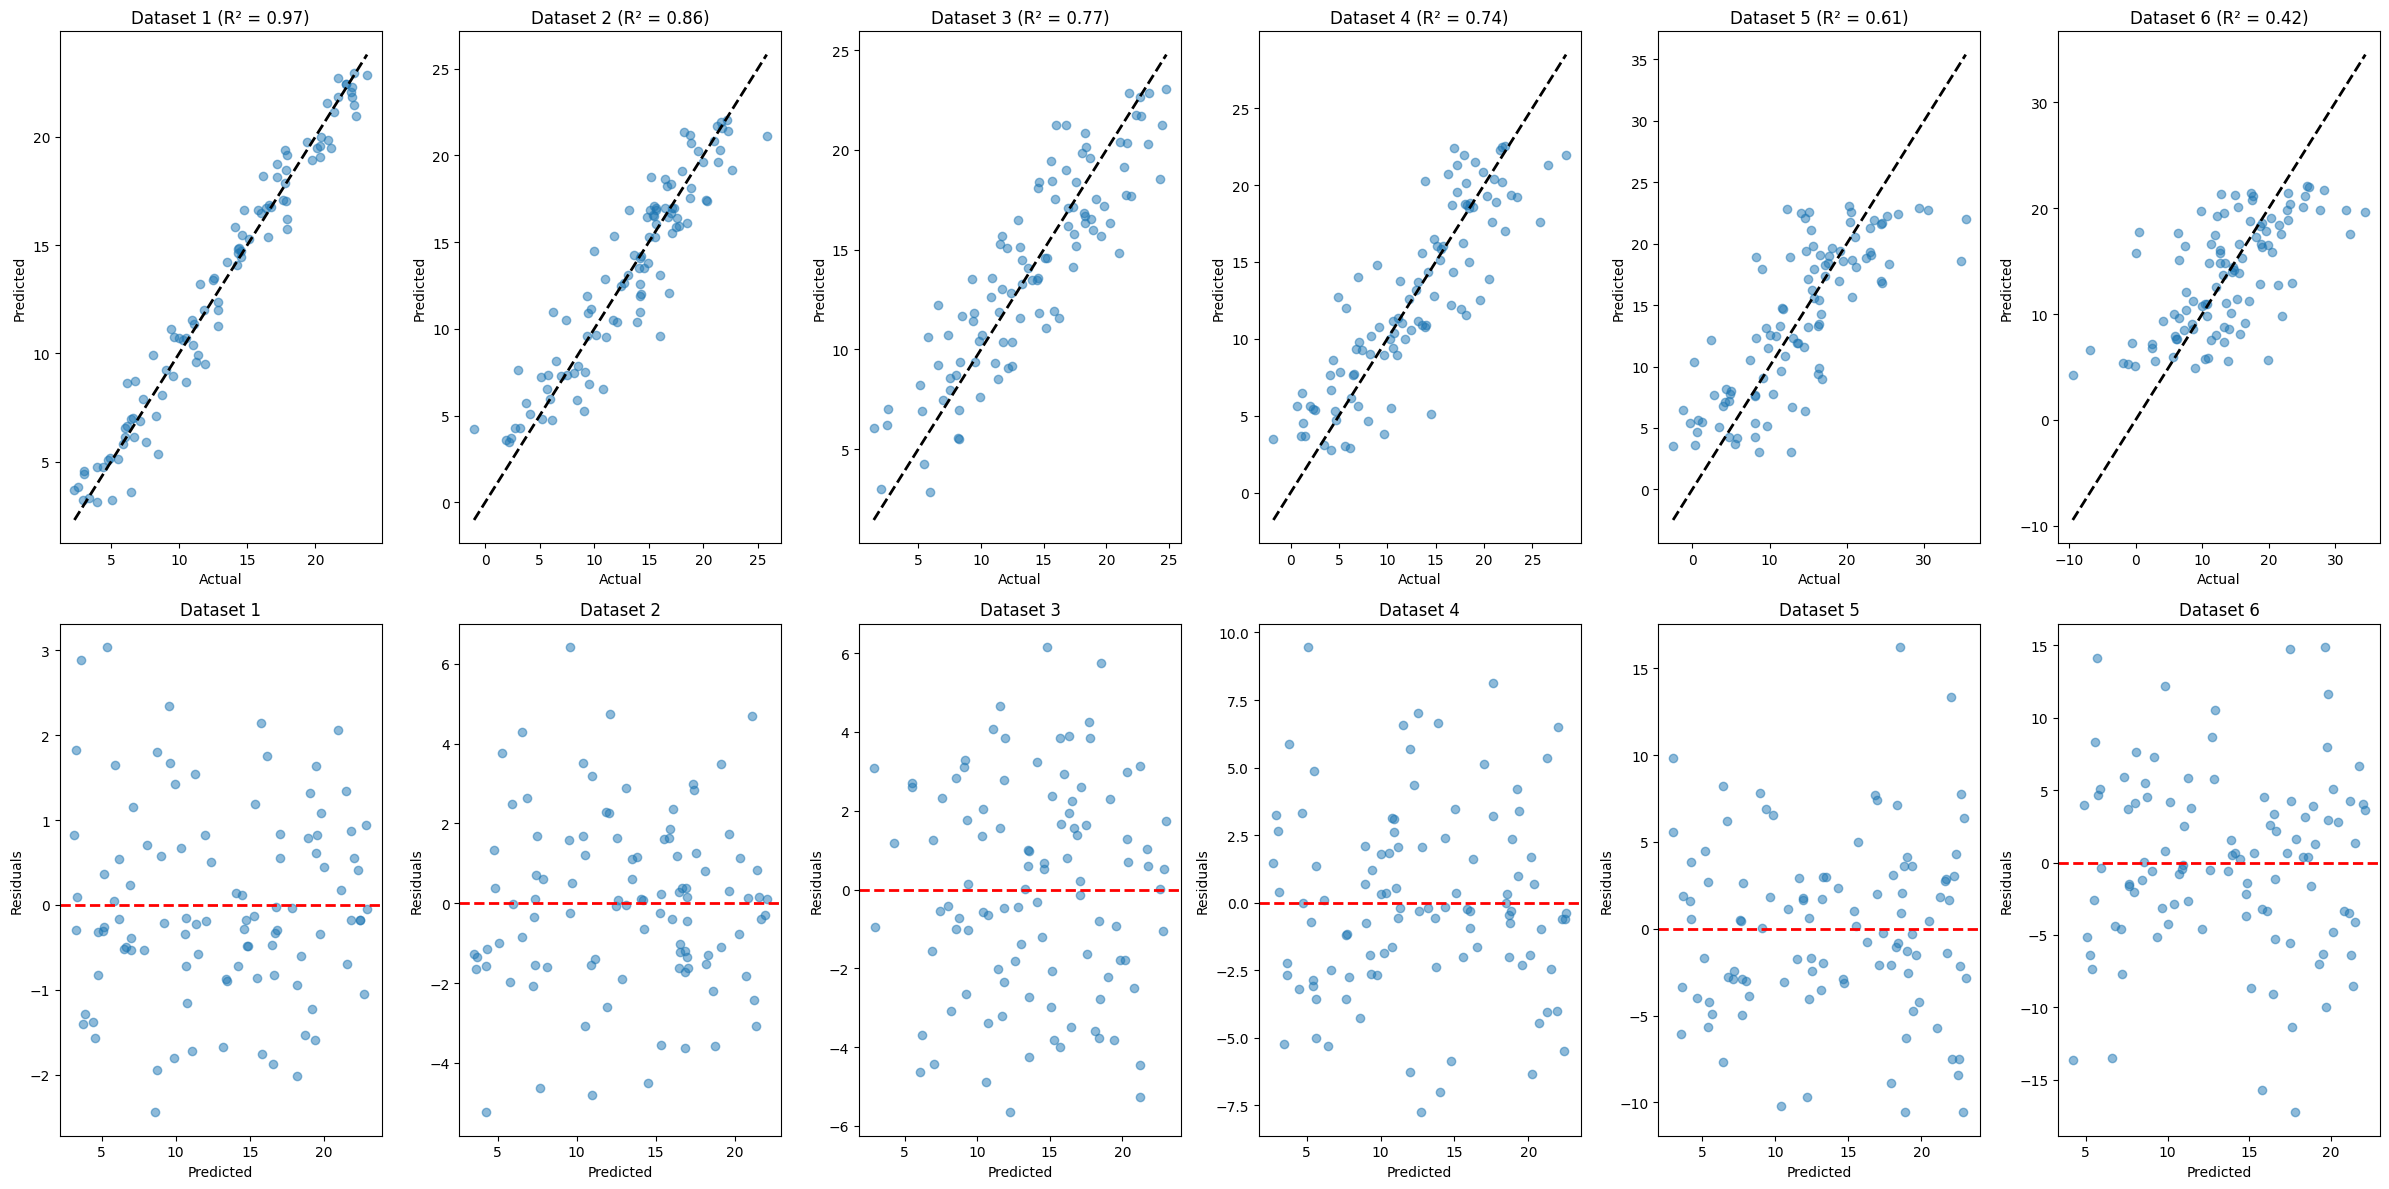

In [10]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_white

def generate_dataset(n_samples, noise_level):
    X = np.random.rand(n_samples, 1) * 10  # Independent variable
    y = 2 * X[:, 0] + 3 + np.random.randn(n_samples) * noise_level  # Dependent variable
    return X, y

def fit_and_plot(X, y, dataset_number):
    X = sm.add_constant(X)  # Add a constant for the intercept
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Actual vs. Predicted Plot
    plt.subplot(2, 6, dataset_number)
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Dataset {dataset_number} (R² = {model.rsquared:.2f})')

    # Residual Plot
    plt.subplot(2, 6, dataset_number + 6)
    plt.scatter(predictions, model.resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Dataset {dataset_number}')

    return model # Return the model instead of just R-squared and residual variance

n_samples = 100
noise_levels = [1, 2, 3, 4, 5, 6]  # Increasing noise levels

plt.figure(figsize=(24, 12))

for i, noise_level in enumerate(noise_levels, start=1):
    X, y = generate_dataset(n_samples, noise_level)
    model = fit_and_plot(X, y, i) # Get the model for each dataset

    # Perform White test for each dataset
    white_test = het_white(model.resid, model.model.exog)

    # Print the results for each dataset
    print(f'Dataset {i}:')
    print(f'  Lagrange Multiplier Statistic: {white_test[0]:.2f}')
    print(f'  p-value: {white_test[1]:.2f}')
    print(f'  f-value: {white_test[2]:.2f}')
    print(f'  f p-value: {white_test[3]:.2f}')
    print('---')

plt.tight_layout()
plt.show()

Dataset 1:
  F-statistic: 0.76
  p-value: 0.82
---
Dataset 2:
  F-statistic: 1.99
  p-value: 0.01
---
Dataset 3:
  F-statistic: 1.04
  p-value: 0.44
---
Dataset 4:
  F-statistic: 0.91
  p-value: 0.63
---
Dataset 5:
  F-statistic: 0.92
  p-value: 0.62
---
Dataset 6:
  F-statistic: 1.00
  p-value: 0.51
---


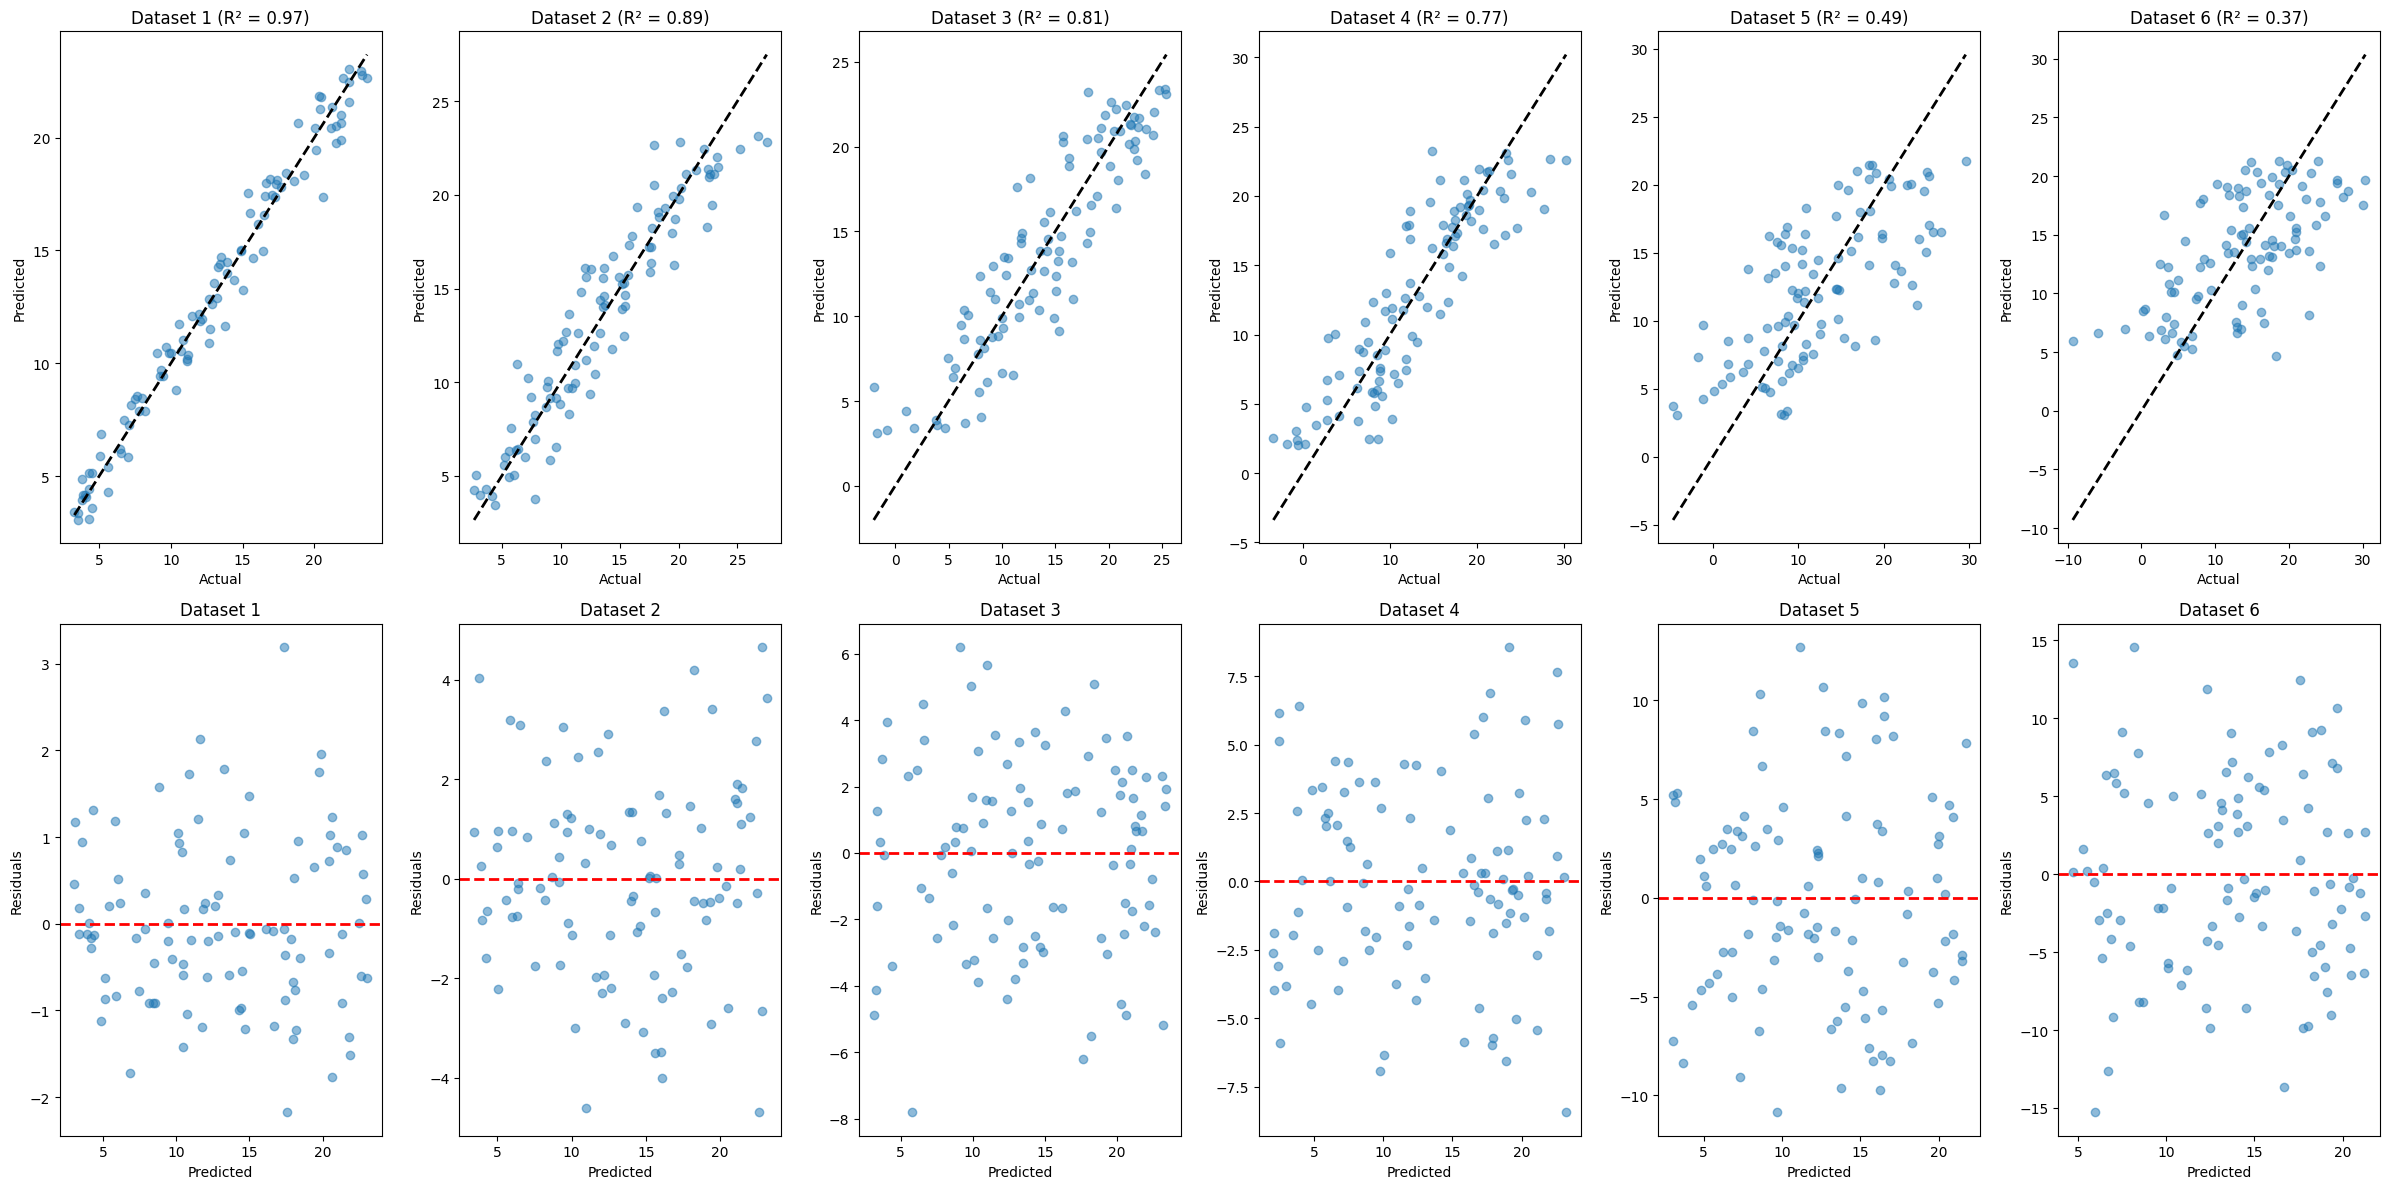

In [11]:
!pip install statsmodels --upgrade
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_goldfeldquandt

def generate_dataset(n_samples, noise_level):
    X = np.random.rand(n_samples, 1) * 10  # Independent variable
    y = 2 * X[:, 0] + 3 + np.random.randn(n_samples) * noise_level  # Dependent variable
    return X, y

def fit_and_plot(X, y, dataset_number):
    X = sm.add_constant(X)  # Add a constant for the intercept
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Actual vs. Predicted Plot
    plt.subplot(2, 6, dataset_number)
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Dataset {dataset_number} (R² = {model.rsquared:.2f})')

    # Residual Plot
    plt.subplot(2, 6, dataset_number + 6)
    plt.scatter(predictions, model.resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Dataset {dataset_number}')

    return model, X, y # Return the model, X, and y

n_samples = 100
noise_levels = [1, 2, 3, 4, 5, 6]  # Increasing noise levels

plt.figure(figsize=(24, 12))

for i, noise_level in enumerate(noise_levels, start=1):
    X, y = generate_dataset(n_samples, noise_level)
    model, X, y = fit_and_plot(X, y, i) # Get the model, X, and y for each dataset

    # Perform Goldfeld-Quandt test for each dataset
    gq_test = het_goldfeldquandt(model.resid, X)

    # Print the results for each dataset
    print(f'Dataset {i}:')
    print(f'  F-statistic: {gq_test[0]:.2f}')
    print(f'  p-value: {gq_test[1]:.2f}')
    print('---')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import scipy.stats as stats

# Example data
data = np.array([5.1, 5.3, 5.5, 5.7, 5.9, 6.0, 6.1, 6.3, 6.5, 6.7])
population_mean = 5.0

# Perform t-test
t_stat, p_value = stats.ttest_1samp(data, population_mean)

# Print results
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference.")
else:
    print("Fail to reject the null hypothesis (H0). No significant difference.")


T-statistic: 5.56
P-value: 0.0004
Reject the null hypothesis (H0). There is a significant difference.


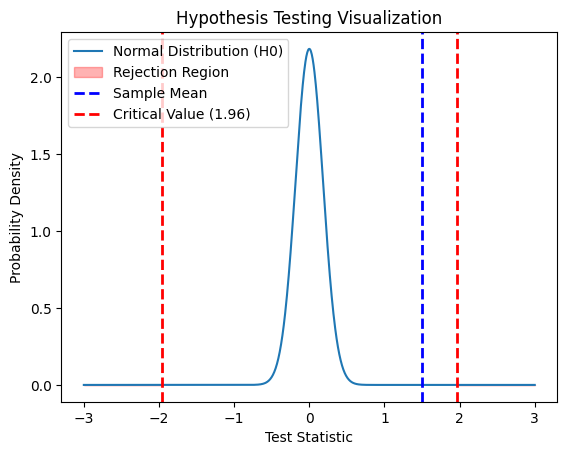

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Parameters
mu = 0  # Population mean
sigma = 1  # Population standard deviation
sample_mean = 1.5  # Sample mean
sample_size = 30  # Sample size
alpha = 0.05  # Significance level

# Generate normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, mu, sigma / np.sqrt(sample_size))

# Calculate critical value
critical_value = stats.norm.ppf(1 - alpha / 2)

# Plot normal distribution
plt.plot(x, y, label='Normal Distribution (H0)')
plt.fill_between(x, y, where=(x >= critical_value) | (x <= -critical_value), color='red', alpha=0.3, label='Rejection Region')
plt.axvline(sample_mean, color='blue', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline(critical_value, color='red', linestyle='dashed', linewidth=2, label=f'Critical Value ({critical_value:.2f})')
plt.axvline(-critical_value, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.title('Hypothesis Testing Visualization')
plt.show()
